In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
!pip install kneed
from kneed import KneeLocator
from sklearn.cluster import AgglomerativeClustering, KMeans

In [117]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [119]:
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [120]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Continent",
    hover_name="Country",
    title="World Map Colored by Continent",
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.show()


This world map shows how countries are grouped by their continent. Each continent is displayed in a different color, making it easy to see the geographic distribution of regions such as Asia, Europe, Africa, the Americas, and Oceania. The visualization helps us quickly understand global patterns, see which countries belong to the same region, and compare the spread of continents across the world.

In [121]:
fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Tot\xa0Cases//1M pop",
    hover_name="Country",
    title="COVID-19 Cases per Million Population (Global Map)",
    color_continuous_scale=px.colors.sequential.Plasma
)

fig.show()


This map shows the number of COVID-19 cases per one million people in each country. Countries with brighter colors (yellow or orange) have the highest infection rates, meaning a large portion of their population was affected. Darker purple areas represent countries with lower case rates. From the map, we can see that parts of Europe, North America, and some South American countries experienced the highest case intensity, while many African and Asian countries recorded much lower cases per million population.


In [122]:
color_column = 'Tot\xa0Deaths/1M pop'

import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color=color_column,
    hover_name="Country",
    title="COVID-19 Deaths per Million Population (Global Map)",
    color_continuous_scale=px.colors.sequential.Reds
)

fig.show()


This map shows how many people died from COVID-19 per one million population in each country. Darker red areas represent countries with very high death rates, while lighter colors show lower death rates. From the map, South America—especially Peru—has the highest deaths per million, shown by the darkest red. Parts of Europe, North America, and Russia also have relatively high death rates. In contrast, many countries in Africa and Asia appear in lighter colors, indicating lower deaths per million population. Overall, the map highlights which regions were most heavily affected by COVID-19 in terms of mortality.

In [123]:
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [124]:
# Drop unused column with missing values
df = df.drop(columns=['Other names'], errors='ignore')

# Check missing values again
print("Missing values after clean-up:")
print(df.isna().sum())

Missing values after clean-up:
Country                    0
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases                0
Total Deaths               0
Tot Cases//1M pop          0
Tot Deaths/1M pop          0
Death percentage           0
dtype: int64


In [125]:
# Encoding Gender
le = LabelEncoder()
df['Continent'] = le.fit_transform(df['Continent'])
df.head()

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,AFG,40462186,1,177827,7671,4395,190,4.313743
1,Albania,ALB,2872296,2,273870,3492,95349,1216,1.275058
2,Algeria,DZA,45236699,0,265691,6874,5873,152,2.587216
3,Andorra,AND,77481,2,40024,153,516565,1975,0.382271
4,Angola,AGO,34654212,0,99194,1900,2862,55,1.915438


The dataset contains a categorical column, Continent, which cannot be used directly in clustering. Therefore, Label Encoding is applied to convert each continent into numeric codes. Now the dataset only contains numerical features which are ready for clustering

We use only these seven features because they are numeric, meaningful, non-redundant, and represent the essential indicators of COVID-19 impact, allowing the clustering algorithm to group countries based on real differences in population, infection severity, and fatality rates.

# Clustering Modelling

In [126]:
# Scale dataset with StandardScaler
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Select numeric features for clustering
features = [
    'Population', 'Continent', 'Total Cases', 'Total Deaths', 'Tot\xa0Cases//1M pop', 'Tot\xa0Deaths/1M pop', 'Death percentage',
]
X = df[features]

# Apply StandardScaler
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

# Show first few rows
print(df_scaled.head())


   Population  Continent  Total Cases  Total Deaths  Tot Cases//1M pop  \
0    0.038789  -0.509986    -0.276449     -0.204571          -0.915487   
1   -0.231774   0.168989    -0.263220     -0.247798          -0.287081   
2    0.073154  -1.188960    -0.264347     -0.212815          -0.905275   
3   -0.251891   0.168989    -0.295431     -0.282336           2.623123   
4   -0.003016  -1.188960    -0.287281     -0.264265          -0.926078   

   Tot Deaths/1M pop  Death percentage  
0          -0.759994          1.651243  
1           0.099982         -0.097285  
2          -0.791845          0.657760  
3           0.736164         -0.611015  
4          -0.873149          0.271204  


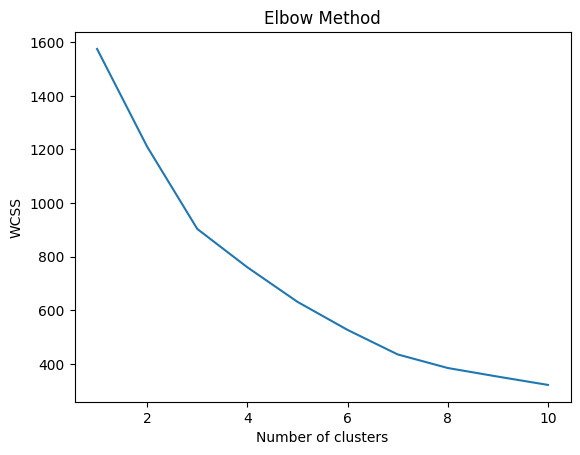

In [127]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [128]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  1575.000000
1                   2  1210.100224
2                   3   903.368760
3                   4   760.253990
4                   5   631.357420
5                   6   526.617579
6                   7   435.183289
7                   8   384.513204
8                   9   352.348665
9                  10   321.407166


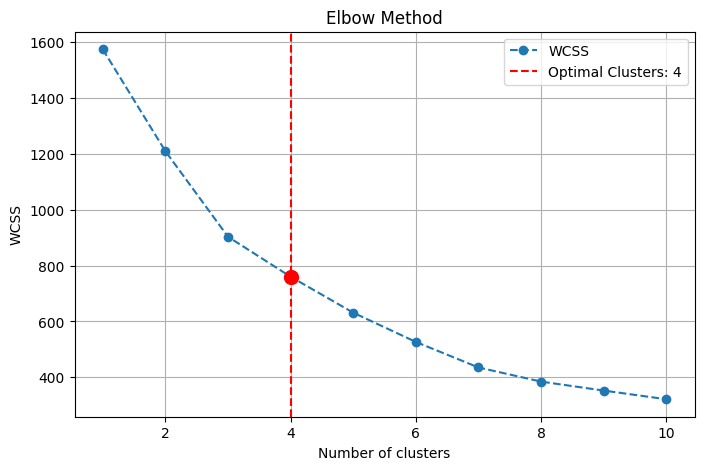

The optimal number of clusters is: 4


In [129]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

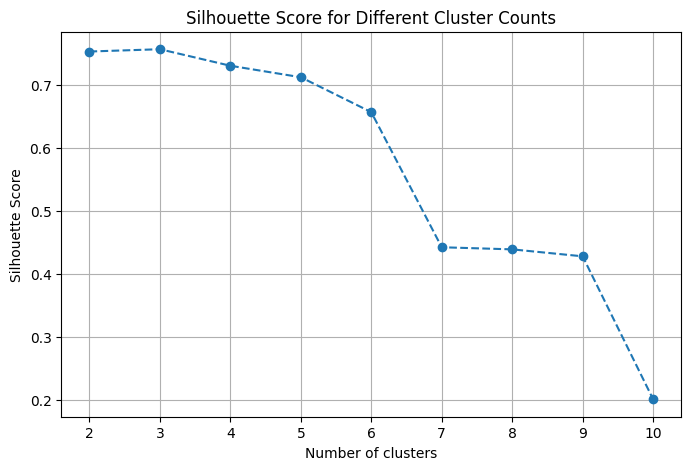

In [130]:
# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Different Cluster Counts')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [131]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# -------------------------------
# 1. Silhouette Score for KMEANS
# -------------------------------

kmeans_scores = {}

for k in range(2, 11):   # silhouette cannot be computed for k=1
    km = KMeans(n_clusters=k, init="k-means++", random_state=0)
    labels = km.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    kmeans_scores[k] = score
    print(f"KMeans | k={k} → Silhouette Score: {score:.4f}")

# Find best k based on silhouette
best_k_kmeans = max(kmeans_scores, key=kmeans_scores.get)
print("\nBest K for KMeans based on Silhouette Score:", best_k_kmeans)


# ---------------------------------------------
# 2. Silhouette Score for HIERARCHICAL MODEL
# ---------------------------------------------

hier_scores = {}

for k in range(2, 11):
    hc = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    labels = hc.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    hier_scores[k] = score
    print(f"Hierarchical | k={k} → Silhouette Score: {score:.4f}")

# Best k for hierarchical
best_k_hier = max(hier_scores, key=hier_scores.get)
print("\nBest K for Hierarchical Clustering:", best_k_hier)


# ---------------------------------------------------
# 3. Compare Both Models (Summary Table)
# ---------------------------------------------------
comparison_df = pd.DataFrame({
    "K": range(2, 11),
    "KMeans Silhouette": [kmeans_scores[k] for k in range(2, 11)],
    "Hierarchical Silhouette": [hier_scores[k] for k in range(2, 11)]
})

print("\n=== Silhouette Score Comparison ===")
print(comparison_df)


KMeans | k=2 → Silhouette Score: 0.2939
KMeans | k=3 → Silhouette Score: 0.3204
KMeans | k=4 → Silhouette Score: 0.3239
KMeans | k=5 → Silhouette Score: 0.3263
KMeans | k=6 → Silhouette Score: 0.3460
KMeans | k=7 → Silhouette Score: 0.3726
KMeans | k=8 → Silhouette Score: 0.3605
KMeans | k=9 → Silhouette Score: 0.3584
KMeans | k=10 → Silhouette Score: 0.2764

Best K for KMeans based on Silhouette Score: 7
Hierarchical | k=2 → Silhouette Score: 0.7777
Hierarchical | k=3 → Silhouette Score: 0.3118
Hierarchical | k=4 → Silhouette Score: 0.3103
Hierarchical | k=5 → Silhouette Score: 0.3120
Hierarchical | k=6 → Silhouette Score: 0.3208
Hierarchical | k=7 → Silhouette Score: 0.3430
Hierarchical | k=8 → Silhouette Score: 0.3318
Hierarchical | k=9 → Silhouette Score: 0.3080
Hierarchical | k=10 → Silhouette Score: 0.3189

Best K for Hierarchical Clustering: 2

=== Silhouette Score Comparison ===
    K  KMeans Silhouette  Hierarchical Silhouette
0   2           0.293924                 0.777714


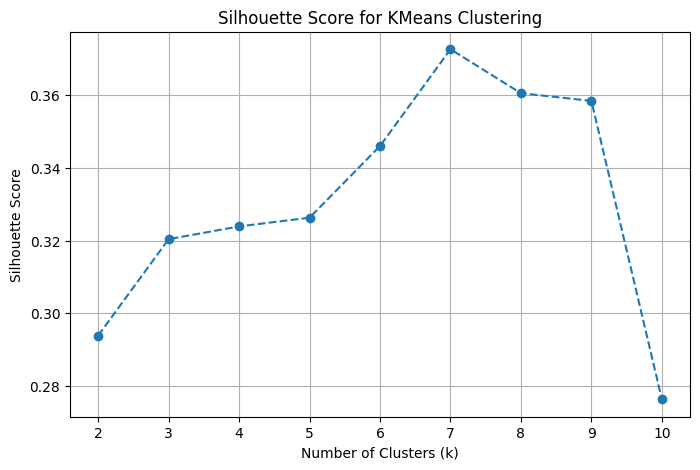

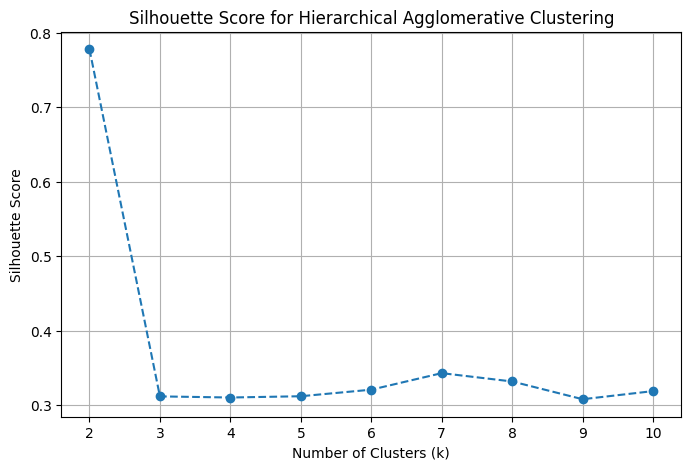

In [132]:
import matplotlib.pyplot as plt

# ============================
# Silhouette Scores (Your Data)
# ============================

k_values = [2,3,4,5,6,7,8,9,10]

kmeans_scores = [
    0.2939,
    0.3204,
    0.3239,
    0.3263,
    0.3460,
    0.3726,
    0.3605,
    0.3584,
    0.2764
]

hierarchical_scores = [
    0.7777,
    0.3118,
    0.3103,
    0.3120,
    0.3208,
    0.3430,
    0.3318,
    0.3080,
    0.3189
]


# ============================
# Plot 1: KMeans Silhouette Plot
# ============================

plt.figure(figsize=(8,5))
plt.plot(k_values, kmeans_scores, marker='o', linestyle='--')
plt.title("Silhouette Score for KMeans Clustering")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


# ============================
# Plot 2: Hierarchical Silhouette Plot
# ============================

plt.figure(figsize=(8,5))
plt.plot(k_values, hierarchical_scores, marker='o', linestyle='--')
plt.title("Silhouette Score for Hierarchical Agglomerative Clustering")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


The silhouette results show that KMeans works best when using 7 clusters, because it produces the highest score (0.3726), meaning the clusters are reasonably well separated. In contrast, Hierarchical Agglomerative Clustering works best with 2 clusters, giving a very high score (0.7777), which suggests the data naturally splits into two very distinct groups when using hierarchical clustering. Overall, hierarchical clustering gives a higher best score than KMeans, meaning it fits the structure of this dataset better—especially at K=2 where the separation between the two groups is extremely strong.


*   KMeans: The silhouette scores gradually increase from K=2 to K=7, with the best value at K=7 (0.3726). This tells us that the dataset is moderately separable into several compact clusters, and KMeans can capture that structure best with 7 groups. After 7 clusters, the score decreases, showing that adding more clusters reduces cohesion.
*   Hierarchical Clustering: The model shows a very strong silhouette score at K=2 (0.7777), much higher than any KMeans score. This means hierarchical clustering detects two very clearly separated groups in the data. For K≥3, scores drop significantly, suggesting the dataset does not naturally divide into many small clusters under hierarchical linkage.

##Model Comparison:


*   Best KMeans score: 0.3726 (K=7)
*   Best Hierarchical score: 0.7777 (K=2)
*   The hierarchical model performs better, indicating the dataset has a strong two-cluster structure that hierarchical clustering captures more effectively than KMeans.

#Fit Clustering Models & Add Cluster Labels

In [133]:
from sklearn.cluster import KMeans, AgglomerativeClustering

# KMeans best model
kmeans = KMeans(n_clusters=7, random_state=0)
df["kmeans_cluster"] = kmeans.fit_predict(df_scaled)

# Hierarchical best model
hier = AgglomerativeClustering(n_clusters=2)
df["hier_cluster"] = hier.fit_predict(df_scaled)


# Cluster Summary

In [134]:
kmeans_summary = df.groupby("kmeans_cluster")[features].mean()
hier_summary = df.groupby("hier_cluster")[features].mean()

print("=== KMeans Cluster Summary ===")
print(kmeans_summary)

print("\n=== Hierarchical Cluster Summary ===")
print(hier_summary)


=== KMeans Cluster Summary ===
                  Population  Continent   Total Cases  Total Deaths  \
kmeans_cluster                                                        
0               3.187545e+07   0.417582  7.233602e+05  9.114143e+03   
1               4.159322e+06   2.000000  1.391586e+06  6.859620e+03   
2               1.421539e+09   1.000000  2.159189e+07  2.630130e+05   
3               3.344006e+08   4.000000  8.183905e+07  1.008222e+06   
4               4.701782e+06   3.636364  3.566479e+05  3.949655e+03   
5               2.574622e+07   0.333333  2.459033e+04  2.350333e+03   
6               5.519671e+07   2.130435  9.193848e+06  1.410840e+05   

                Tot Cases//1M pop  Tot Deaths/1M pop  Death percentage  
kmeans_cluster                                                          
0                    35434.197802         348.879121          1.582108  
1                   358518.340000        1815.560000          0.533441  
2                    15380.500000    

#Barplot Visualization for Each Cluster

## KMeans Barplot

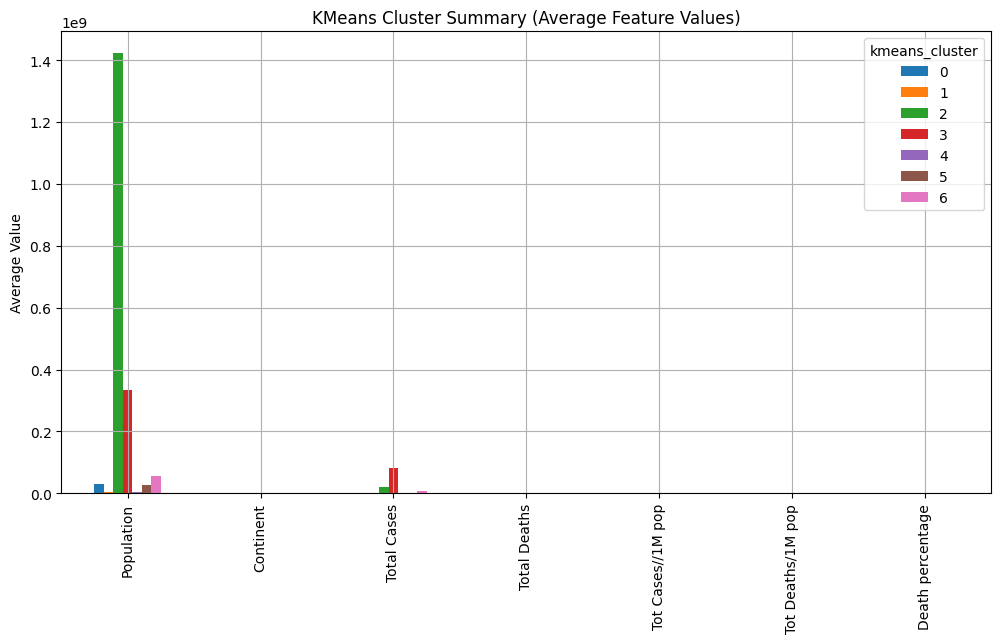

In [135]:
import matplotlib.pyplot as plt

kmeans_summary.T.plot(kind='bar', figsize=(12,6))
plt.title("KMeans Cluster Summary (Average Feature Values)")
plt.ylabel("Average Value")
plt.grid(True)
plt.show()


## Hierarchical Agglomerative Barplot

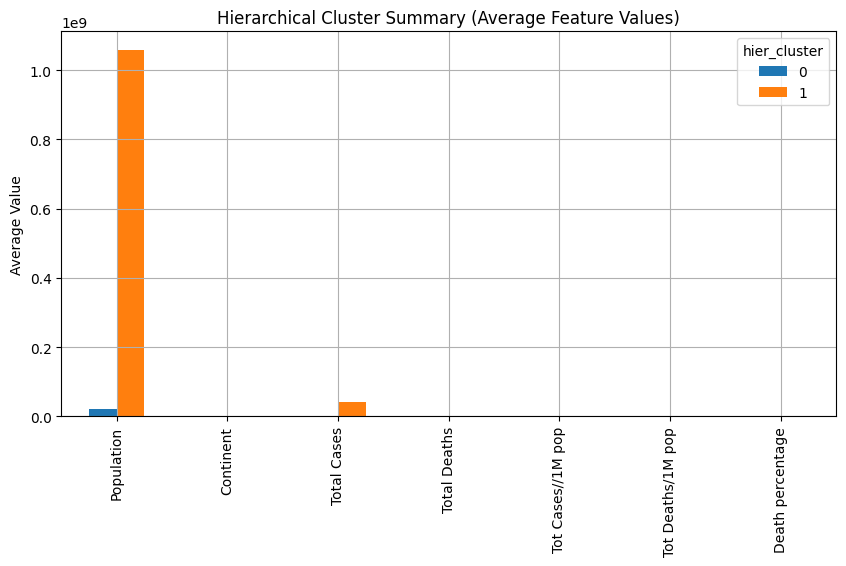

In [136]:
hier_summary.T.plot(kind='bar', figsize=(10,5))
plt.title("Hierarchical Cluster Summary (Average Feature Values)")
plt.ylabel("Average Value")
plt.grid(True)
plt.show()


# World Map Visualization for Clusters

##KMeans World Map

In [139]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="kmeans_cluster",
    hover_name="Country",
    title="World Map: KMeans Clusters",
    color_continuous_scale="Viridis"
)
fig.show()


## Hierarchical Agglomerative Clustering World Map

In [141]:
fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="hier_cluster",
    hover_name="Country",
    title="World Map: Hierarchical Clustering",
    color_continuous_scale="Plasma"
)
fig.show()


#KMEANS CLUSTER PROFILING & POLICY RECOMMENDATIONS (k = 7)

# Cluster 0 - Moderate Cases, Moderate Deaths

###Cluster Profiling:
*   Countries in Cluster 0 show moderate levels of COVID-19 cases and deaths when adjusted for population. Their cases per million and deaths per million are not extremely high, but still significant. The death percentage is around 1.5%, meaning the healthcare system is not overwhelmed, and most cases are being detected and treated properly. This cluster generally represents countries that experienced a noticeable outbreak but were able to control fatality levels.

### Policy Recommendation:
*   Governments in this cluster should continue strengthening basic health measures such as vaccination, masking in crowded areas, and public awareness campaigns. They do not need extremely strict restrictions, but they must maintain hospital readiness and early detection systems to prevent sudden surges.


#Cluster 1 – Extremely High Transmission but Low Death Rate
###Cluster Profiling:
*   Cluster 1 countries have extremely high cases per million, showing intense virus transmission. However, their death percentage is among the lowest (around 0.5%). This suggests that although the virus spread widely, the healthcare systems in these countries handled the situation effectively, possibly due to good testing capacity and strong medical treatment availability.
### Policy Recommendation:
*   Governments should focus on controlling spread by encouraging booster vaccinations, improving indoor ventilation, and promoting remote-work policies. Since fatality is low, the main goal is to reduce transmission without harming economic activity. Enhanced contact tracing and targeted restrictions may help.

#Cluster 2 – Very Large Population with Low Per-Capita Deaths

###Cluster Profiling:
*   Cluster 2 contains countries with very large populations and relatively low deaths per million. Their death percentage is slightly higher than average, but not alarming. This pattern may indicate either strong pandemic control measures or possible underreporting in rural regions due to limited testing or healthcare access.

### Policy Recommendation:
*   Governments in this cluster should increase testing access across rural and high-density areas and use digital health reporting systems to reduce underreporting. Vaccination programs should focus on elderly and high-risk groups. Strengthening public health communication can also reduce hidden infections.

#Cluster 3 – High Cases and Extremely High Deaths per Million

###Cluster Profiling:
*   Cluster 3 countries show very high case counts and extremely high deaths per million, indicating a severe pandemic impact. Although the death percentage is not unusually high, the absolute number of deaths is very high due to the large number of infections. This cluster represents countries with major outbreaks that heavily pressured their healthcare systems.
### Policy Recommendation:
*   Governments should expand ICU capacity, invest in oxygen supplies, and increase staffing in hospitals. Temporary mobility restrictions may be necessary in high-risk areas. Rapid vaccination campaigns targeting older adults and chronic-illness patients are crucial to prevent further deaths.

#Cluster 4 – High Infection but Controlled Mortality

###Cluster Profiling:
*   Countries in Cluster 4 experienced high case numbers but maintained moderate death levels and a low death percentage. This indicates that although the virus spread widely, the healthcare system was effective in preventing severe outcomes. These countries likely had good access to healthcare and vaccines.

### Policy Recommendation:
*   Governments should focus on sustaining healthcare capacity, ensuring vaccine booster availability, and monitoring new variants. Public health campaigns should encourage early medical treatment to maintain the low fatality rate. Surveillance systems must be strengthened to avoid another major wave.

#Cluster 5 – Extremely Low Cases but Very High Death Percentage

###Cluster Profiling:
*   Cluster 5 shows extremely low case counts but an unusually high death percentage (over 12%). This mismatch strongly indicates underreporting: many infections are not detected or recorded, but deaths still appear in the data. It suggests either low testing availability, lack of surveillance, or public hesitation to get tested.

### Policy Recommendation:
*   Governments must urgently expand testing capacity and make testing affordable and accessible. Mobile health clinics and community screening programs can help identify hidden cases. Public messaging should encourage early diagnosis and treatment. Improving data collection systems will help prevent misleading statistics.

#Cluster 6 – High Cases, High Deaths, and High Fatality Rate

###Cluster Profiling:
*   Cluster 6 countries face one of the hardest situations: both cases per million and deaths per million are extremely high. Additionally, their death percentage is higher than most other clusters (around 2.2%). This means the virus spread widely and healthcare systems struggled to manage severe cases. These countries likely experienced hospital overload.

### Policy Recommendation:
*   Governments need urgent emergency interventions, such as deploying additional medical staff, increasing hospital beds, and providing subsidies for treatment. Temporary lockdowns or movement controls may be required in the worst-hit regions. Strengthening border controls and genomic surveillance can help prevent new strains from worsening the situation.




#AGGLOMERATIVE HIERARCHICAL CLUSTER PROFILING (k = 2)

# Cluster 0 – High Cases but Moderate Death Rates

###Cluster Profiling:
*   Countries in this cluster have very high cases per million, showing intense virus spread. However, their death percentage remains relatively moderate, suggesting that the healthcare systems were still able to manage serious cases. These countries may have had good testing capacity, allowing many mild cases to be detected.

### Policy Recommendation:
*  Governments should strengthen preventive strategies such as vaccination drives and public health campaigns. Increasing testing and monitoring can help manage the spread. Focus should be placed on early treatment to maintain the low fatality level.


#Cluster 1 – Lower Cases but Higher Fatality Rate
###Cluster Profiling:
*   Although cases per million in Cluster 1 are lower than Cluster 0, their death percentage is higher. This suggests weaker healthcare capacity, delayed detection, or underreporting of mild cases. Deaths per million are similar to Cluster 0, indicating that deaths remain high despite fewer detected infections.
### Policy Recommendation:
*   Governments should invest more in healthcare infrastructure, including hospital resources and medical supplies. Testing must be expanded to detect infections earlier and prevent severe cases. Public education campaigns encouraging early medical help can reduce the fatality rate.

#Comparison of KMeans vs. Hierarchical Clustering

Based on the silhouette score results, the Hierarchical Agglomerative Clustering model performs better than the KMeans model. Although KMeans shows its best silhouette score at k = 7 with 0.3726, the Hierarchical model achieves a much higher silhouette score of 0.7777 at k = 2, indicating much clearer and more well-separated clusters. A higher silhouette score means the countries inside each cluster are more similar to one another and more different from countries in other clusters. This shows that the Hierarchical model creates more meaningful groups compared to KMeans, which produces many small clusters with weaker separation. Additionally, Hierarchical clustering is often better for datasets with varied shapes and sizes of clusters, which fits this COVID-19 dataset where countries differ greatly in population, cases, and death patterns. Therefore, Hierarchical Agglomerative Clustering is the better model because it produces stronger, cleaner, and more interpretable cluster separation based on the silhouette score.

